In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

# Load data into memory
data = pd.read_csv('data.csv')
print(f"Shape of the data: {data.shape}\n")
print(data.head())

data = np.array(data)
Y = data[:, :1]
X = data[:, 1:].T
d, N = X.shape
print(X.shape, Y.shape)

Shape of the data: (42000, 785)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783

In [12]:
a = 1
b = 2
c = 7

idx = (Y[:, 0] == a) | (Y[:, 0] == b) | (Y[:, 0] == c) 
Y = Y[idx, :]
X = X[:, idx] 
d, N = X.shape
print(X.shape, Y.shape)

def split_data(X, Y, Ntrain):
    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx] 
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return (Xtrain, Ytrain), (Xtest, Ytest)

Ntrain = int(0.8*N) 
(Xtrain, Ytrain), (Xtest, Ytest) = split_data(X, Y, Ntrain)
print(Xtrain.shape, Xtest.shape)

def split(X, Y, l):
    idx = (Y[:, 0] == l) 
    Yl = Y[idx, :]
    Xl = X[:, idx]
    return Xl, Yl

X1train, Y1train = split(Xtrain, Ytrain, a)
X2train, Y2train = split(Xtrain, Ytrain, b)
X3train, Y3train = split(Xtrain, Ytrain, c)
print(X1train.shape, X2train.shape, X3train.shape)

(784, 13262) (13262, 1)
(784, 10609) (784, 2653)
(784, 3758) (784, 3334) (784, 3517)


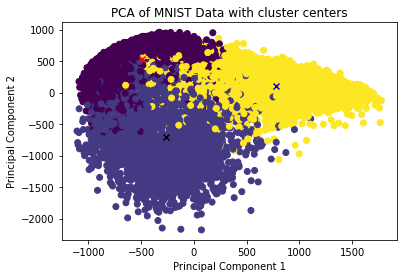

distances centroid from train set: (1579.8060448333401, 992.2714508464583, 1155.3178770136608)


In [13]:
#PCA
def centroid(X):
    return np.mean(X, axis=1, keepdims=True)

def PCA(X, k):
    cx = centroid(X)
    Xc = X - cx 
    #print(f"Centroid of Xc is: {np.linalg.norm(centroid(Xc))}")

    U, _, _ = np.linalg.svd(Xc, full_matrices=False) 

    Uk = U[:, :k]
    Zk = Uk.T @ Xc

    return Zk, U

k=2
Zk_train, U = PCA(Xtrain, k)

Zk1_train, _ = split(Zk_train, Ytrain, a)
Zk2_train, _ = split(Zk_train, Ytrain, b)
Zk3_train, _ = split(Zk_train, Ytrain, c)

cx1 = centroid(Zk1_train)
cx2 = centroid(Zk2_train)
cx3 = centroid(Zk3_train)

# Visualize the clusters and the position of the centroid for each cluster
def visualize_2d():
  plt.scatter(Zk_train[0, :], Zk_train[1, :], c=Ytrain) 
  plt.scatter(cx1[0], cx1[1], marker='x', color='red')
  plt.scatter(cx2[0], cx2[1], marker='x', color='black')
  plt.scatter(cx3[0], cx3[1], marker='x', color='blue')
  plt.title("PCA of MNIST Data with cluster centers")
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.show()


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
def visualize_3d():
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d') 
  ax.scatter(Zk_train[0, :], Zk_train[1, :], Zk_train[2, :], c=Ytrain, label="Data Points")
  ax.scatter(cx1[0], cx1[1], cx1[2], marker='x', color='red', label="Cluster 1")
  ax.scatter(cx2[0], cx2[1], cx2[2], marker='x', color='black', label="Cluster 2")
  ax.scatter(cx3[0], cx3[1], cx3[2], marker='x', color='blue', label="Cluster 3")
  ax.set_title("PCA of MNIST Data with Cluster Centers (3D)")
  ax.set_xlabel("Principal Component 1")
  ax.set_ylabel("Principal Component 2")
  ax.set_zlabel("Principal Component 3")
  #ax.legend()
  plt.show()

if k==2: visualize_2d()
elif k==3 : visualize_3d()

# Compute, for each cluster, the average distance from the centroid. 
def get_distance(data, point):
  dist = []
  for item in data.T:
    dist.append(np.linalg.norm(item - point[:, np.newaxis]))
  return np.mean(dist)

d1 = get_distance(Zk1_train, cx1)
d2 = get_distance(Zk2_train, cx2)
d3 = get_distance(Zk3_train, cx3)
print(f'distances centroid from train set: {d1, d2, d3}')

In [14]:
#Compute, for each cluster, the average distance from the centroid on the test set. 
def PCA_test(X, U, k):
    cx = centroid(X)
    Xc = X - cx 
    Uk = U[:, :k]
    Zk = Uk.T @ Xc
    return Zk

Zk_test = PCA_test(Xtest, U, k)

Zk1_test, _ = split(Zk_test, Ytest, a)
Zk2_test, _ = split(Zk_test, Ytest, b)
Zk3_test, _ = split(Zk_test, Ytest, c)

cx1_test = centroid(Zk1_test)
cx2_test = centroid(Zk2_test)
cx3_test = centroid(Zk3_test)

d1 = get_distance(Zk1_test, cx1_test)
d2 = get_distance(Zk2_test, cx2_test)
d3 = get_distance(Zk3_test, cx3_test)
print(f'distances centroid from test set: {d1, d2, d3}')

distances centroid from test set: (1583.9411541317959, 996.0114986039383, 1142.7094026817674)


In [15]:
#Define a classification algorithm in this way: given a new observation x, compute the distance between
#x and each cluster centroid. Assign x to the class corresponding the the closer centroid. Compute the
#accuracy of this algorithm on the test set and compute its accuracy;

def find_cluster(x):
    d1 = np.linalg.norm(x - cx1, 2)
    d2 = np.linalg.norm(x - cx2, 2)
    d3 = np.linalg.norm(x - cx3, 2)
    mind = np.min([d1, d2, d3])
    if mind == d1: return a
    elif mind == d2: return b
    else: return c

def accuracy(Y):
    pred = 0
    for i in range(len(Y)):
        if find_cluster(Zk_test[:, i]) != Y[i] :
            pred +=1
    return 1-pred/len(Y)

print(accuracy(Ytest))


0.7052393516773464
